# Optional  Lab: Cost Function 
<figure>
    <center> <img src="./images/C1_W1_L3_S2_Lecture_b.png"  style="width:1000px;height:200px;" ></center>
</figure>



## Goals
In this lab you will:
- you will implement and explore the `cost` function for linear regression with one variable. 


## Tools
In this lab we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- local plotting routines in the lab_utils_uni.py file in the local directory

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [3]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$
J(w,b) = \frac{1}{2m} \sum_{i = 0}^{m-1} \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)^2 \tag{1}
$$

 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [4]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

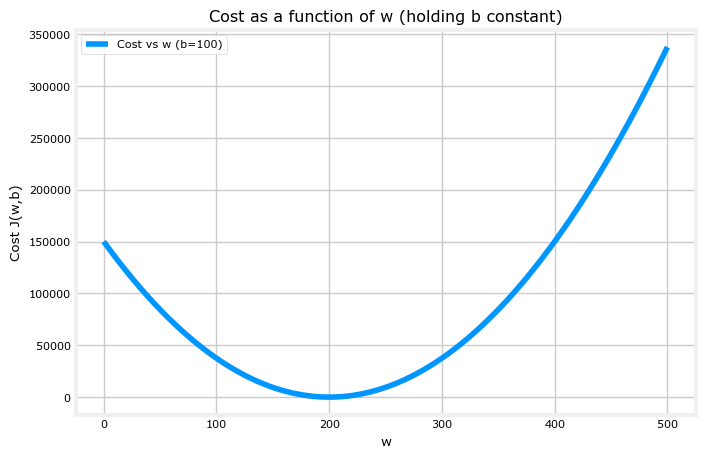

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# exemple: données simples
x_train = np.array([1.0, 2.0, 3.0, 4.0])
y_train = np.array([300.0, 500.0, 700.0, 900.0])

# On fixe b et on fait varier w
b = 100
w_range = np.linspace(0, 500, 100)   # 100 valeurs de w entre 0 et 500
costs = [compute_cost(x_train, y_train, w, b) for w in w_range]

# Visualisation
plt.figure(figsize=(8,5))
plt.plot(w_range, costs, label=f"Cost vs w (b={b})")
plt.xlabel("w")
plt.ylabel("Cost J(w,b)")
plt.title("Cost as a function of w (holding b constant)")
plt.legend()
plt.grid(True)
plt.show()

## Cost Function Intuition

<img align="left" src="./images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:380px; padding: 10px;  " /> Your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $ w $ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized.
